In [1]:
from __future__ import annotations
import argparse
import os
from pathlib import Path
from typing import List, Tuple

import librosa
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from tinytag import TinyTag 

In [2]:
DATA_PATH = Path('data-source/audio/PD_AH/')
OUTPUT_PATH = Path('artifacts/mel_specs/')
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

In [10]:
raw_audio = os.listdir(DATA_PATH)
for wav in raw_audio:
    file_path = DATA_PATH / wav
 #Attenzione: modelli come Wav2Vec sono addestrati su 16 kHz, cambiare con sr = 16000
 
    y, sr = librosa.load(file_path, sr=8000)
    y = librosa.util.normalize(y)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    np.save(OUTPUT_PATH / (Path(wav).stem + ".npy"), mel)

In [3]:
pippo = np.load(OUTPUT_PATH / 'AH_545616858-3A749CBC-3FEB-4D35-820E-E45C3E5B9B6A.npy')
pippo

array([[-37.46119 , -33.69839 , -32.964535, ..., -80.      , -80.      ,
        -80.      ],
       [-25.625454, -26.382456, -23.069235, ..., -80.      , -80.      ,
        -80.      ],
       [-32.54491 , -26.51846 , -24.919353, ..., -80.      , -80.      ,
        -80.      ],
       ...,
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)

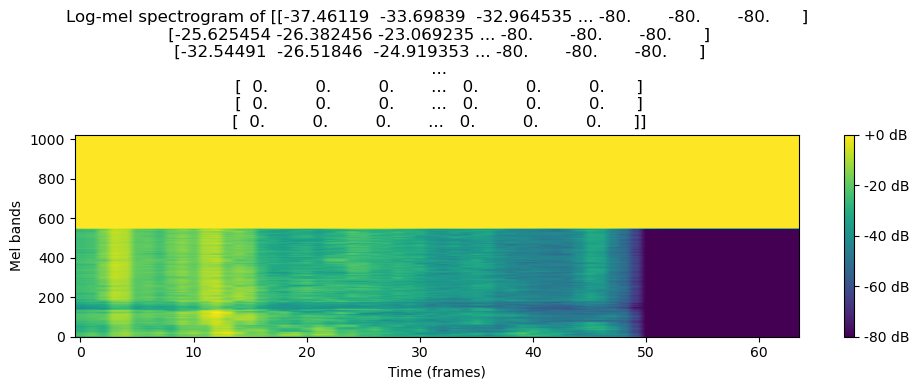

In [5]:
plt.figure(figsize=(10, 4))
plt.imshow(pippo, aspect="auto", origin="lower")
plt.colorbar(format="%+2.0f dB")
plt.title(f"Log-mel spectrogram of {pippo}")
plt.xlabel("Time (frames)")
plt.ylabel("Mel bands")
plt.tight_layout()
plt.show()
plt.clf()
plt.close()

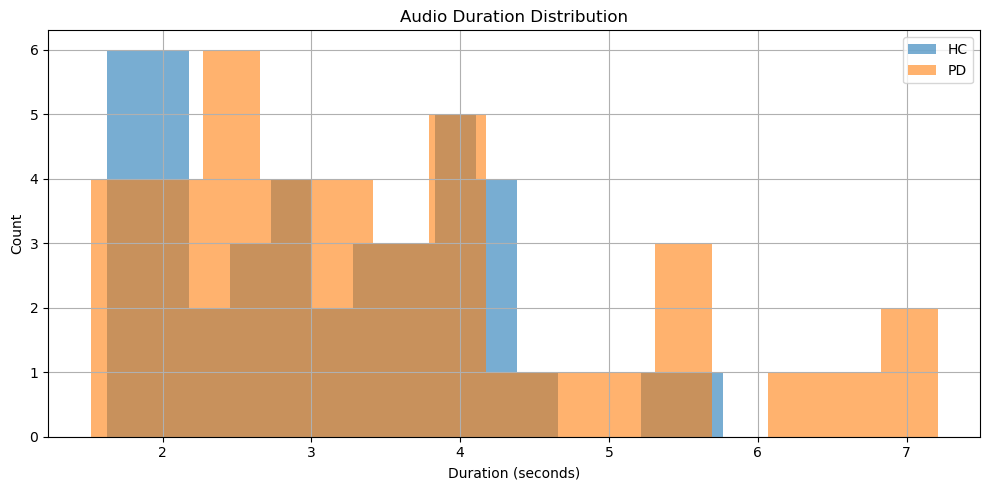

Duration stats (seconds):
count    81.000000
mean      3.324088
std       1.335175
min       1.516125
25%       2.267375
50%       3.101875
75%       4.007625
max       7.208000
Name: duration_sec, dtype: float64


In [9]:
import os
import soundfile as sf
import pandas as pd
import matplotlib.pyplot as plt

# Paths
data_dirs = {
    "HC": "data-source/audio/HC_AH",
    "PD": "data-source/audio/PD_AH"
}

records = []

for label, folder in data_dirs.items():
    for fname in os.listdir(folder):
        if fname.endswith(".wav"):
            path = os.path.join(folder, fname)
            try:
                with sf.SoundFile(path) as f:
                    duration = len(f) / f.samplerate
                    bit_rate = f.samplerate * f.channels * f.subtype_info  # info only, rough estimation
                    records.append({
                        "label": label,
                        "filename": fname,
                        "duration_sec": duration,
                        "sample_rate": f.samplerate,
                        "bit_depth": f.subtype_info
                    })
            except RuntimeError as e:
                print(f"Failed to read {fname}: {e}")

# Save to CSV
df = pd.DataFrame(records)
df.to_csv("audio_metadata.csv", index=False)

# Plot durations
plt.figure(figsize=(10, 5))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.hist(subset['duration_sec'], bins=15, alpha=0.6, label=label)
plt.title("Audio Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("duration_distribution.png")
plt.show()

# Print stats
print("Duration stats (seconds):")
print(df['duration_sec'].describe())


In [2]:
import numpy as np
from pathlib import Path
CACHE_DIR = Path("artifacts/mel_specs")
sano = np.load(CACHE_DIR / "HC_AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.npy")
malato = np.load(CACHE_DIR / "PD_AH_545629296-C2C009C6-8C17-42EA-B6BE-362942FC4692.npy")

print(f"Healthy sample shape: {sano.shape}")
print(f"Sick sample shape: {malato.shape}")

assert sano.shape == malato.shape, "Shape mismatch between healthy and sick samples"

Healthy sample shape: (1024, 64)
Sick sample shape: (1024, 64)
